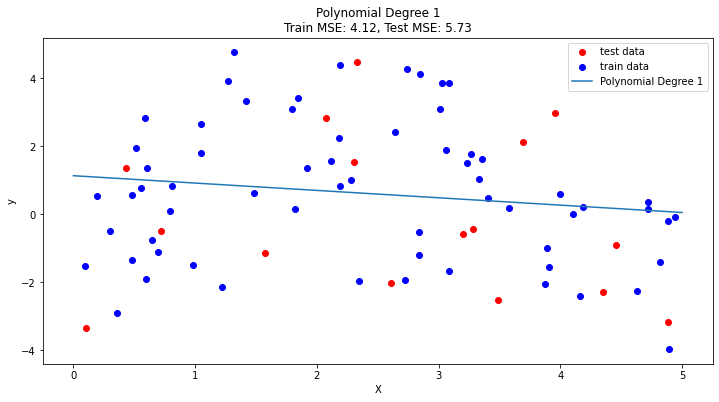

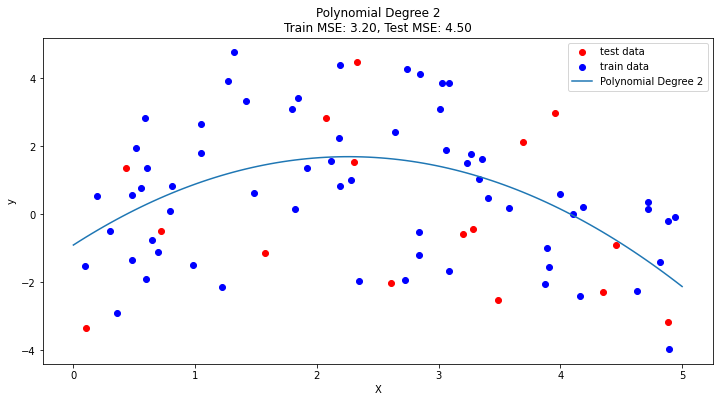

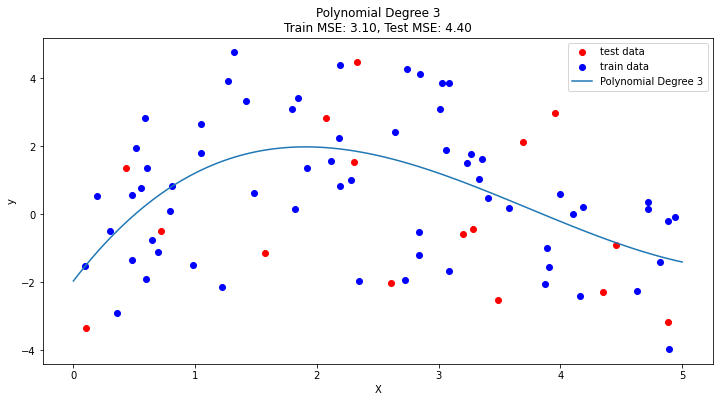

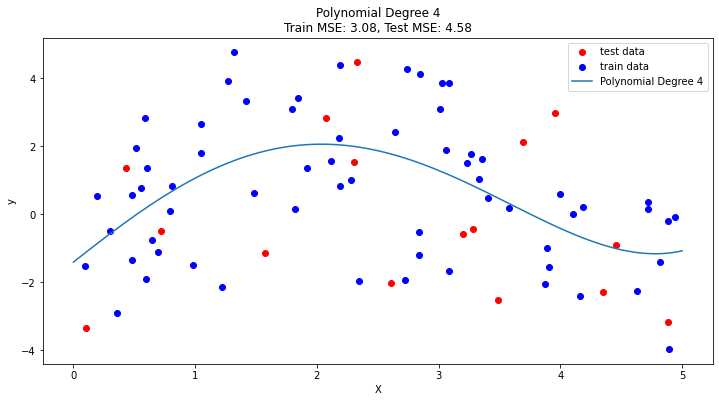

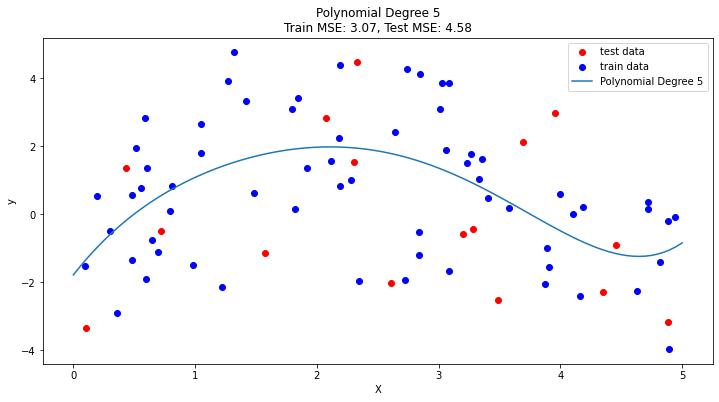

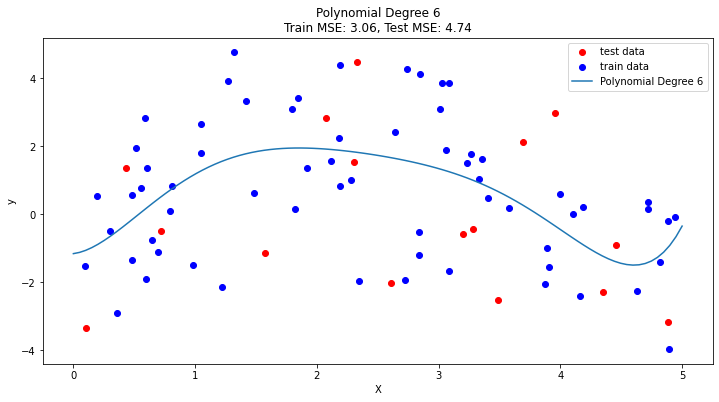

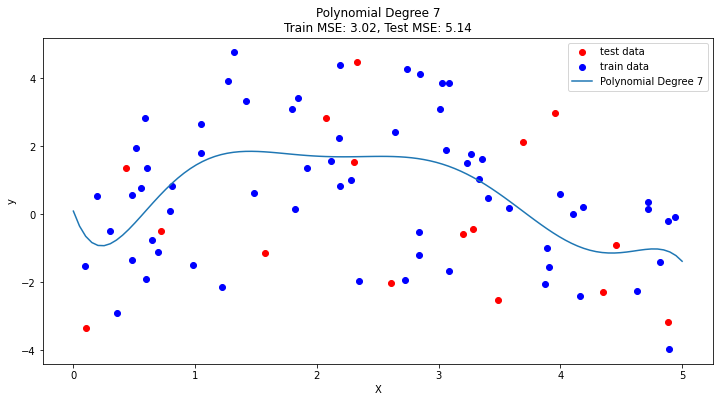

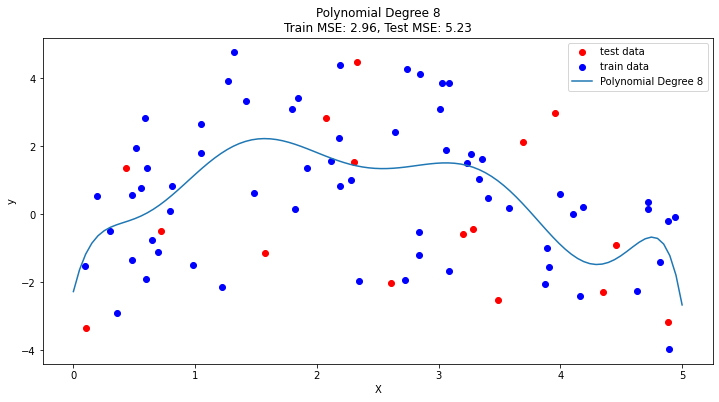

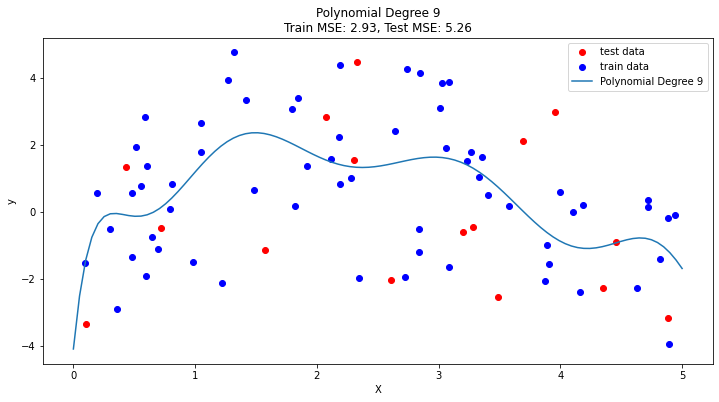

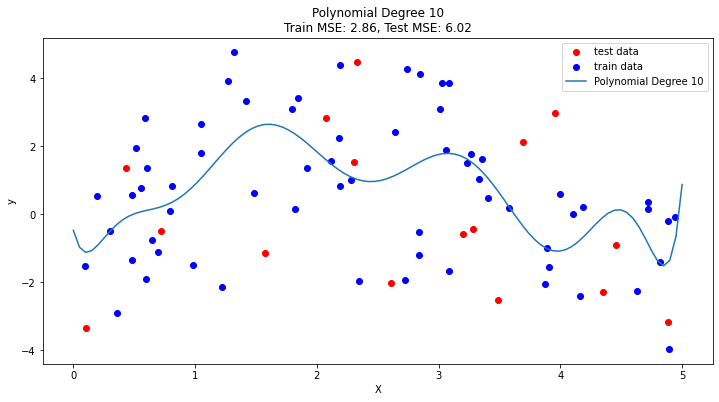

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(5*np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 2, X.shape[0])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


train_mse_list=[]
test_mse_list=[]
# Function to plot model and data
def plot_model(degree):

    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_poly_train, y_train)
    
    y_train_pred = model.predict(X_poly_train)
    y_test_pred = model.predict(X_poly_test)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    
    X_range = np.linspace(0, 5, 100).reshape(-1, 1)
    X_poly_range = polynomial_features.transform(X_range)
    y_range_pred = model.predict(X_poly_range)

    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='red', label='test data')
    plt.scatter(X_train, y_train, color='blue', label='train data')
    plt.plot(X_range, y_range_pred, label=f'Polynomial Degree {degree}')
    plt.title(f'Polynomial Degree {degree}\nTrain MSE: {train_mse:.2f}, Test MSE: {test_mse:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

# Plot models with different polynomial degrees
poly_deg_list=[1,2,3,4,5,6,7,8,9,10]
for degree in poly_deg_list:
    plot_model(degree)

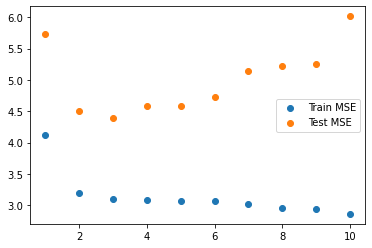

In [5]:
plt.scatter(poly_deg_list,train_mse_list,label="Train MSE")
plt.scatter(poly_deg_list,test_mse_list,label="Test MSE")
plt.legend()

# Lets animate this to run for various train-test splits and see what happens to the bias variance trade-off

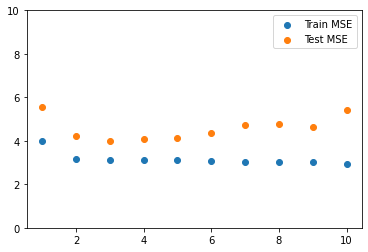

In [3]:
from IPython.display import clear_output
import time

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i*10)
    train_mse_list=[]
    test_mse_list=[]
    def model(degree):
        polynomial_features = PolynomialFeatures(degree=degree)
        X_poly_train = polynomial_features.fit_transform(X_train)
        X_poly_test = polynomial_features.transform(X_test)
        model = LinearRegression()
        model.fit(X_poly_train, y_train)
        y_train_pred = model.predict(X_poly_train)
        y_test_pred = model.predict(X_poly_test)
        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        X_range = np.linspace(0, 5, 100).reshape(-1, 1)
        X_poly_range = polynomial_features.transform(X_range)
        y_range_pred = model.predict(X_poly_range)
        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)
    poly_deg_list=[1,2,3,4,5,6,7,8,9,10]
    for degree in poly_deg_list:
        model(degree)
    plt.scatter(poly_deg_list,train_mse_list,label="Train MSE")
    plt.scatter(poly_deg_list,test_mse_list,label="Test MSE")
    plt.ylim([0,10])
    plt.legend()
    plt.show()
    time.sleep(0.2)
    clear_output(wait=True)